<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Alireza Belal
    
    
____


### Full Name : Fakhredin Abdi
### Student Number : 99106458
___

# Setup

# 0. Preparation

In this part, you will use a dataset related to COVID-19. Load your dataset using pandas.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
categorical_feature_mask = covid_data.dtypes == object
cateforical_cols = covid_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
covid_data[cateforical_cols] = covid_data[cateforical_cols].apply(lambda col: le.fit_transform(col))
covid_data = covid_data.astype(float)

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)


---------------

# 1. DNN as nonlinear dimensionality reduction method (50 Points)

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html).
(It would be ok to use PyTorch as well.)
Reduce the dimension of the data to 2 dimensions and visualize the low-dimensional data.

In [3]:
# import necessary libraries
import tensorflow

import keras
from keras.models import Sequential
from keras.layers import ReLU ,Input, Dense, Dropout, Flatten, Activation
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import activations


In [4]:
def AutoEncoder():
    input = keras.Input(shape= 20 )
    
    
    en1 = layers.Dense(15, activation='relu')(input)
    en2 = layers.Dense(10, activation='relu')(en1)
    en3 = layers.Dense(5, activation='relu')(en2)
    encoded = layers.Dense(2, activation='linear')(en3)

    de1 = layers.Dense(5, activation='relu')(encoded)
    de2 = layers.Dense(10, activation='relu')(de1)
    de3 = layers.Dense(15, activation='sigmoid')(de2)
    decoded = layers.Dense(20, activation='relu')(de3)

    return keras.Model(input, decoded)

In [5]:
# train the model and reduce the dimension of the data (15 Points)

autoencoder = AutoEncoder()
autoencoder.compile(optimizer='adam', loss='mse')

# train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=40, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
96/96 [==============================] - 2s 10ms/step - loss: 0.3585 - val_loss: 0.3479
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3276 - val_loss: 0.3098
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.3009 - val_loss: 0.2951
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2899 - val_loss: 0.2895
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2833 - val_loss: 0.2828
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 0.2782 - val_loss: 0.2797
Epoch 7/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2758 - val_loss: 0.2780
Epoch 8/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2743 - val_loss: 0.2768
Epoch 9/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2731 - val_loss: 0.2757
Epoch 10/100
96/96 [==============================] - 1s 5ms/step - loss: 0.2720 - val_loss: 0.2746
Epoch 11

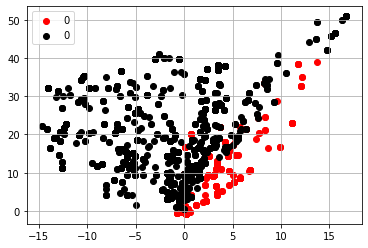

In [6]:
# Plot the encoded data (10 Points)
# چون سوال نخواسته بود برای داده های تست مدل را تست کنیم
# برای همین از داده های تست برای ولیدیشن استفاده کردیم تا مدل بهترین خروجی را روی داده تست داشته باشد
encoded_data = autoencoder.layers[:5]
fig, ax = plt.subplots()
for layer in encoded_data:
  X_test = layer(X_test)
x1 = X_test[y_test == 0]
label = '1' if 0 else '0'
ax.scatter(x1[:, 0], x1[:, 1], c= 'red', label=label)
x2 = X_test[y_test == 1]
label = '1' if 0 else '0'
ax.scatter(x2[:, 0], x2[:, 1], c= 'black', label=label)

ax.legend()
ax.grid(True)
plt.show()